Tutorial 9: Aggregator
======================

In the previous tutorial, we fitted 3 datasets with an identical `NonLinearSearch`, outputting the results of each to a
unique folder on our hard disk.

In this tutorial, we'll use the `Aggregator` to load the `Result`'s and manipulate / plot them using our Jupyter
notebook. The API for using `Result`'s follow closely tutorial 1 of this chapter.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autofit as af

/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace`


To load the results of the previous tutorial into the `Aggregator`, we simply point the `Aggregator` class to the path 
of the results we want it to load.

In [2]:
agg = af.Aggregator(directory=path.join("output", "howtofit", "chapter_1", "database"))

Aggregator loading phases... could take some time.

 A total of 3 phases and results were found.


To begin, let me quickly explain what a generator is in Python, for those unaware. A generator is an object that 
iterates over a function when it is called. The `Aggregator` creates all objects as generators, rather than lists, or 
dictionaries, or whatever.

Why? Because lists and dictionaries store every entry in memory simultaneously. If you fit many `Dataset`s, you'll 
have lots of results and therefore use a lot of memory. This will crash your laptop! On the other hand, a generator 
only stores the object in memory when it runs the function; it is free to overwrite it afterwards. Thus, your laptop 
won't crash!

There are two things to bare in mind with generators:

 1) A generator has no length, thus to determine how many entries of data it corresponds to you first must turn it to a 
    list.

 2) Once we use a generator, we cannot use it again and we'll need to remake it. For this reason, we typically avoid 
    storing the generator as a variable and instead use the `Aggregator` to create them on use.

We can now create a `Samples` generator of every fit. This creates instances of the `Samples` class we manipulated in
tutorial 1, which with the `Aggregator` now acts as an interface between the results of the non-linear fit on your 
hard-disk and Python.

In [3]:
samples_gen = agg.values("samples")

When we print this list of outputs you should see over 3 different `NestSamples` instances, corresponding to the 3
model-fits we performed in the previous tutorial.

In [4]:
print("Emcee Samples:\n")
print(samples_gen)
print("Total Samples Objects = ", len(list(samples_gen)), "\n")

Emcee Samples:

Total Samples Objects =  3 



We've encountered the `Samples` class in previous tutorials. As we saw in tutorial 1, the `Samples` class contains all 
the accepted parameter samples of the `NonLinearSearch`, which is a list of lists where:

 - The outer list is the size of the total number of samples.
 - The inner list is the size of the number of free parameters in the fit.

With the `Aggregator` we can now get information on the `Samples` of all 3 model-fits, as opposed to just 1 fit using 
its `Result` object.

In [5]:
for samples in agg.values("samples"):
    print("All parameters of the very first sample")
    print(samples.parameters[0])
    print("The tenth sample`s third parameter")
    print(samples.parameters[9][2])
    print()

All parameters of the very first sample
[49.6632910231864, 0.8618035893686871, 12.602216229469207]
The tenth sample`s third parameter
12.636204866076458

All parameters of the very first sample
[50.1496243468997, 0.8390986324234752, 12.547823615031259]
The tenth sample`s third parameter
12.357047646547441

All parameters of the very first sample
[50.75650444519518, 0.8929583544673789, 12.267112925772201]
The tenth sample`s third parameter
12.003658695808276



We can use the `Aggregator` to get information on the `log_likelihoods`, log_priors`, `weights`, etc. of every fit.

In [6]:
for samples in agg.values("samples"):
    print("log(likelihood), log(prior), log(posterior) and weight of the tenth sample.")
    print(samples.log_likelihoods[9])
    print(samples.log_priors[9])
    print(samples.log_posteriors[9])
    print(samples.weights[9])
    print()

log(likelihood), log(prior), log(posterior) and weight of the tenth sample.
-53993.4624030837
1.0450015261383183
-53992.41740155756
1.0

log(likelihood), log(prior), log(posterior) and weight of the tenth sample.
-10313.865277064278
1.0562758383713635
-10312.809001225907
1.0

log(likelihood), log(prior), log(posterior) and weight of the tenth sample.
-4902.90726399055
0.7864236821512738
-4902.120840308398
1.0



We can use the `Sample`'s to create a list of the `max_log_likelihood_vector` of each fit to our three images.

In [7]:
vector = [samps.max_log_likelihood_vector for samps in agg.values("samples")]
print("Maximum Log Likelihood Parameter Lists:\n")
print(vector, "\n")

Maximum Log Likelihood Parameter Lists:

[[49.99896775323861, 24.834900281017386, 0.9953674831882762], [49.87665666174239, 24.813040448460082, 4.965611694771138], [49.77629874225814, 24.636228640254046, 9.628206185901684]] 



As discussed in tutorial 1, using vectors isn't too much use, as we can`t be sure which values correspond to which 
parameters.

We can use the `Aggregator` to create the `max_log_likelihood_instance` of every fit.

In [8]:
instances = [samps.max_log_likelihood_instance for samps in agg.values("samples")]
print("Maximum Log Likelihood Model Instances:\n")
print(instances, "\n")

Maximum Log Likelihood Model Instances:

[<autofit.mapper.model.ModelInstance object at 0x7f7d3a761f40>, <autofit.mapper.model.ModelInstance object at 0x7f7d55f7ce80>, <autofit.mapper.model.ModelInstance object at 0x7f7d32ec4250>] 



The model instance contains all the model components of our fit which for the fits above was a single `Gaussian`
profile (the word `gaussian` comes from what we called it in the `CollectionPriorModel` above).

In [9]:
print(instances[0].gaussian)
print(instances[1].gaussian)
print(instances[2].gaussian)

This, of course, gives us access to any individual parameter of our maximum log likelihood `instance`. Below, we see 
that the 3 `Gaussian`s were simulated using `sigma` values of 1.0, 5.0 and 10.0.

In [10]:
print(instances[0].gaussian.sigma)
print(instances[1].gaussian.sigma)
print(instances[2].gaussian.sigma)

0.9953674831882762
4.965611694771138
9.628206185901684


We can also access the `median_pdf` model via the `Aggregator`, as we saw for the `Samples` object in tutorial 1.

In [11]:
mp_vectors = [samps.median_pdf_vector for samps in agg.values("samples")]
mp_instances = [samps.median_pdf_instance for samps in agg.values("samples")]

print("Median PDF Model Parameter Lists:\n")
print(mp_vectors, "\n")
print("Most probable Model Instances:\n")
print(mp_instances, "\n")

Median PDF Model Parameter Lists:

[[49.99923367067804, 24.842288298352784, 0.9954992244756227], [49.87603848875523, 24.81612173795271, 4.966723220833882], [49.78544124791978, 24.656534958320172, 9.628973281225084]] 

Most probable Model Instances:

[<autofit.mapper.model.ModelInstance object at 0x7f7d3aaaf670>, <autofit.mapper.model.ModelInstance object at 0x7f7d3a2622b0>, <autofit.mapper.model.ModelInstance object at 0x7f7d32ed0340>] 



We can also print the `model_results` of all phases, which is string that summarizes every fit`s model providing
quick inspection of all results.

In [12]:
results = agg.model_results
print("Model Results Summary:\n")
print(results, "\n")

Model Results Summary:



Maximum Likelihood                                                                        178.59641704

Maximum Log Likelihood Model:

gaussian
    centre                                                                                49.999
    intensity                                                                             24.835
    sigma                                                                                 0.995


Summary (3.0 sigma limits):

gaussian
    centre                                                                                50.00 (49.99, 50.01)
    intensity                                                                             24.84 (24.61, 25.09)
    sigma                                                                                 1.00 (0.98, 1.01)


Summary (1.0 sigma limits):

gaussian
    centre                                                                                50.00 (50.00, 50.00)
    intensity      

Lets end the tutorial with something more ambitious. Lets create a plot of the inferred `sigma` values vs `intensity` 
of each `Gaussian` profile, including error bars at $3\sigma$ confidence.

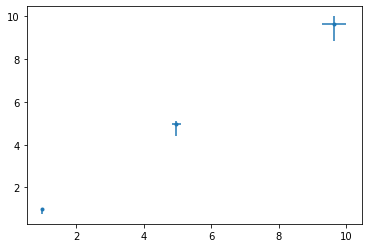

In [13]:
import matplotlib.pyplot as plt

mp_instances = [samps.median_pdf_instance for samps in agg.values("samples")]
ue3_instances = [
    samp.error_instance_at_upper_sigma(sigma=3.0) for samp in agg.values("samples")
]
le3_instances = [
    samp.error_instance_at_lower_sigma(sigma=3.0) for samp in agg.values("samples")
]

mp_sigmas = [instance.gaussian.sigma for instance in mp_instances]
ue3_sigmas = [instance.gaussian.sigma for instance in ue3_instances]
le3_sigmas = [instance.gaussian.sigma for instance in le3_instances]
mp_intensitys = [instance.gaussian.sigma for instance in mp_instances]
ue3_intensitys = [instance.gaussian.sigma for instance in ue3_instances]
le3_intensitys = [instance.gaussian.intensity for instance in le3_instances]

plt.errorbar(
    x=mp_sigmas,
    y=mp_intensitys,
    marker=".",
    linestyle="",
    xerr=[le3_sigmas, ue3_sigmas],
    yerr=[le3_intensitys, ue3_intensitys],
)
plt.show()

Finish.